## Lagrange interpolation

Given $(n+1)$ distinct points $\{X_i\}_{i=0}^n$ in the interval $[0,1]$,
we define the *Lagrange interpolation* operator $\mathcal{L}^n$ the operator
$$
\mathcal{L}^n : C^0([0,1]) \mapsto \mathcal{P}^n
$$
which satisfies
$$
(\mathcal{L}^n f)(X_i) = f(X_i), \qquad i=0,\dots,n.
$$

This operator is used to approximate the infinitely dimensional space $C^0([0,1])$ with a
finite dimensional one, $\mathcal{P}^n$, which is the space of polynomials of order n. 

Such a space has dimension $n+1$, and can be constructed using linear combinations of 
$n+1$ linear independent polynomials of order $\leq n$, for example, the monomials:

$$
\mathcal{P}^n = \text{span}\{v_i := x^i\}_{i=0}^{n}
$$

If we want to construct the Lagrange interpolation of a given function on $n+1$ equispaced points in 
$[0,1]$, then we are actively looking for an element of $\mathcal{P}^n$ that coincides with the function
at these given points.

Given a basis $\{v_i\}_{i=0}^n$, any element of $\mathcal{P}^n$ can be written as a linear combination of 
the basis, i.e., 

$$
\forall p \in \mathcal{P}^n, \quad  \exists! \{p^i\}_{i=0}^n  \quad| \quad p(x) = \sum_{i=0}^n p^i v_i(x)
$$

in what follows, we'll use [Einstein summation convention](https://en.wikipedia.org/wiki/Einstein_notation), and 
call $p$ a function of $\mathcal{P}^n$, and $[p]$ the $R^{n+1}$ vector representing its coefficients. 

If we want to solve the interpolation problem above, then we need to find the coefficients $p^i$ of the 
polynomial $p$ that interpolates $f$ at the points $X_i$:

$$
v_j(X_i) p^j = f(X_i), \qquad \Longleftrightarrow \qquad [[V]][p] = [F]
$$

(Remember Einstein summation convention)

This can be written as a linear problem $[V] [p] = [F]$, with system matrix $[V]_{ij} :=  v_j(X_i)$ and right 
hand side $[F]_i = f(X_i)$.

In [1]:
# The following line will import all numpy and matplotlib, so that everything we do later can be done 
# without the "np." prefix
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Use this function througout the notebook as the function to interpolate
def my_function(x):
    return 1/(1+100*(x-0.5)**2)

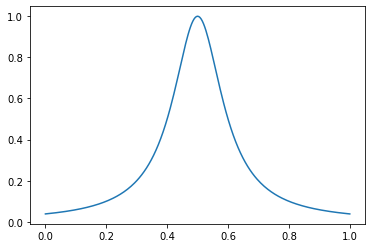

In [3]:
# The x points are used for plotting
x = linspace(0,1,257)

plot(x, my_function(x))

The set of points in which we interpolate is 
$$
\{X_i\}_{i=0}^n
$$

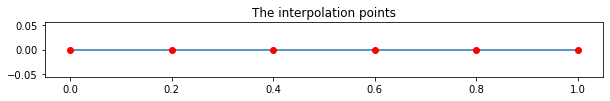

In [4]:
# If I want to ignore the output of a function, I write `_ = function(...)`

n = 5 # order of the polynomial
X = linspace(0, 1, n+1)
figsize(10,1)
plot(x, 0*x)
plot(X, 0*X, 'ro')
_ = title('The interpolation points')

In [5]:
# We build a function to evaluate the monomial basis

def basis(x, i, n): # v_i(x)
    """
    Monomial basis
    
    n is the order of the polynomial
    i is a number between 0 and n INCLUSIVE 
    the function returns the ith basis for P^n
    """
    assert i <= n
    return x**i

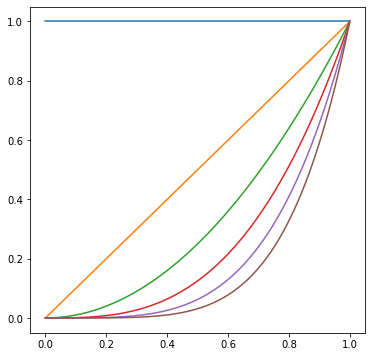

In [6]:
x = linspace(0,1,257)
figsize(6,6)
for i in range(n+1):
    plot(x, basis(x,i,n))

Given a basis $\{v_i\}_{i=0}^n$ for $P^n = \text{span}\{v_i\}_{i=0}^n$, we need to solve

$$
p(X_i) = \sum_j p^j v_j(X_i) = f(X_i) \qquad [V] [p] = [F]
$$

In [7]:
V = zeros((n+1, n+1)) # create a zero matrix [V]
for i in range(n+1):  # fill it with [V]_ij = v_j(X_i)
    for j in range(n+1):
        V[i,j] = basis(X[i], j, n)

# shorthand, oneliner, pythonic nerdy way to do it
# V = array([[basis(X[i], j, n) for j in range(0,n+1)] for i in range(0,n+1)])

In [8]:
# Now fill the vector [u]
# u = zeros((n+1,))
# for i in range(n+1):
#     u[i] = my_function(X_i)

# Numpy allows you to do this in one line
u = my_function(X)

In [9]:
# solve the linear system
p = solve(V, u)

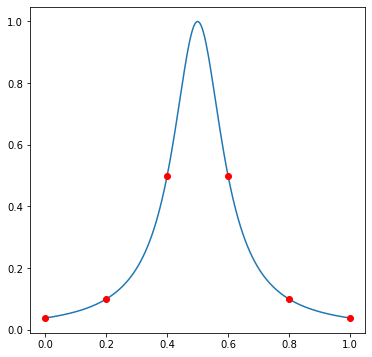

In [10]:
plot(x, my_function(x))
_ = plot(X, V.dot(p), 'ro')
# The second line is the same as
# plot(X, my_function(X))

Let's call $[B] = B_{ij}$ the matrix $v_j(x[i])$ so that 

$$
p(x[i]) = [B][p] = \sum_j p^j v_j(x[i])
$$

In [11]:
B = array([[basis(x[i], j, n) for j in range(n+1)] for i in range(len(x))])
B.shape

(257, 6)

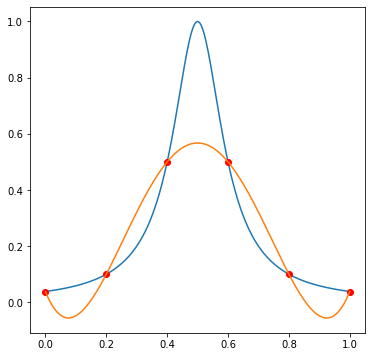

In [12]:
plot(x, my_function(x))
plot(X, my_function(X), 'ro')
plot(x, B.dot(p))

For the purpouse of this lecture, we approximate the $L^\infty$ norm of a $C^0([0,1])$ as the $l^\infty$ (notice the small cap) of the function evaluated on $x[i]$:

$$
\|u \|_{L^\infty([0,1])} \sim \max_i |u(x_i)|
$$

What is the error we committed in approximating $u$ with $p = I^n u$ where $I^n$ is the polynomial interpolation?

$$
\| p -u\| ??
$$

In [13]:
error = np.max(abs(B.dot(p)-my_function(x)))
error

0.43269230769230926

Now we gather everything that we did so far in a single function, and we try to study how things work as we increase the polynomial degree

In [14]:
def interpolate(fun, X, x):
    """
    Returns the polynomial of order (len(X)-1) that interpolates fun at the points X, evaluated at x, 
    together with the interpolation matrix, and the computed Vandermond matrix
    """
    assert len(unique(X)) == len(X)
    n = len(X)-1
    V = array([[basis(X[i], j, n) for j in range(0,n+1)] for i in range(0,n+1)])
    print("Condition number of V:", cond(V))
    B = array([[basis(x[i], j, n) for j in range(0,n+1)] for i in range(len(x))])
    p = solve(V, fun(X))
    return B.dot(p), p, B, V

Condition number of V: 4924.3710566110185


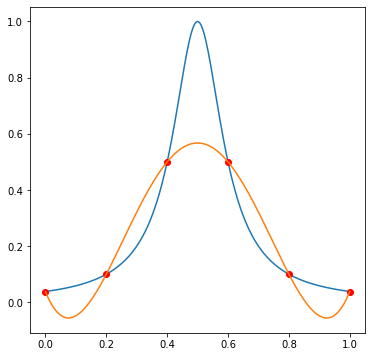

In [15]:
plot(x, my_function(x))
plot(X, my_function(X), 'ro')
_ = plot(x, interpolate(my_function,X,x)[0])

Condition number of V: 4924.3710566110185
Condition number of V: 36061.1608802107
Condition number of V: 267816.70090760005
Condition number of V: 2009396.380023899
Condition number of V: 15193229.677179
Condition number of V: 115575244.50779596
Condition number of V: 883478685.7331275
Condition number of V: 6780588427.121857
Condition number of V: 52214930591.983574
Condition number of V: 403235308988.2878
Condition number of V: 3121649964989.3745
Condition number of V: 24218495751976.035
Condition number of V: 188208055656309.06
Condition number of V: 1467889041963799.0
Condition number of V: 1.1584400332153032e+16
Condition number of V: 8.635219350568261e+16
Condition number of V: 6.268251360834794e+17
Condition number of V: 6.873072868012115e+17
Condition number of V: 1.1356877547672115e+18
Condition number of V: 1.1617448528502093e+21
Condition number of V: 2.550313716252092e+18
Condition number of V: 1.562430052634129e+19
Condition number of V: 9.723383756897372e+18
Condition num

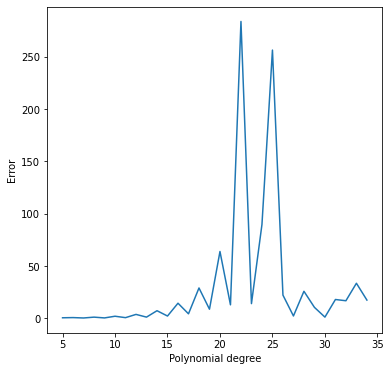

In [16]:
error = []
N = range(5,35)
for n in N:
    X = linspace(0,1,n+1)
    error.append(np.max(abs(interpolate(my_function, X, x)[0]-my_function(x))))
plot(N, error)
xlabel('Polynomial degree')
_ = ylabel('Error')

In [17]:
X = linspace(0,1,5)
px, p, B, V = interpolate(my_function, X, x)

Condition number of V: 686.4349418185958


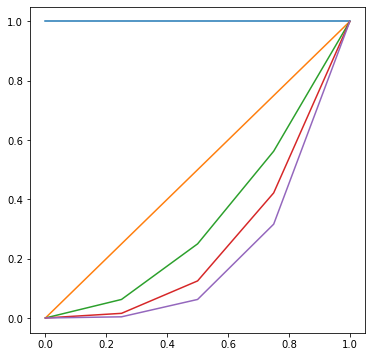

In [18]:
_ = plot(X, V)

If we were working on exact aritmethic, we could compute a new basis for which the interpolation matrix $[V]$ is the identity, in order to reduce the problems with the condition numbers of the matrix.

In particular, we would like to build the new basis $\ell_i$ in such a way that they satisfy

$$
\ell_i(X_j) = \delta_{ij}
$$

These are called **Lagrange basis**.

It is clear that if the basis satisfies $\ell_i(X_j) = \delta_{ij}$, then the matrix $[V]_{ij} := \ell_i(X_j)  = \delta_{ij}$ is the identity, i.e., the coefficients (in this basis) of the polynomial $p$ are given by:

$$
[p] = [V]^{-1} [F] = [F]
$$
i.e., $[p]_i = [F]_i = f(X_i)$

How do we compute the basis $\ell_i$, once we have the monomial basis?

In the previous computation, we constructed the polynomial $p(x)$ evaluated on $[x]$. Let's call this vector $[P]$:

$$
[P] = [B][p] = [B][V]^{-1}[F]
$$

Therefore, the equivalent of the matrix $B$ for the basis $\ell_i$ must be

$$
[B_\ell] := [B][V]^{-1}
$$
From which we deduce that the **columns** of $[V]^{-1}$ represents the coefficients of $\ell_i$ in the basis $v_i$, that is:

$$
\ell_i = \sum_j [V]^{-T}_{ij} v_j
$$

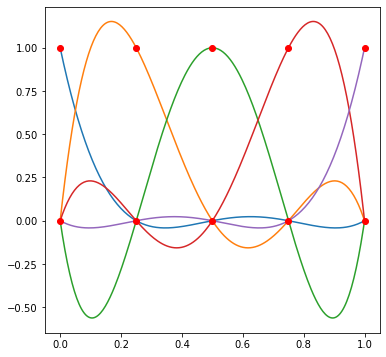

In [19]:
Vinv = inv(V)
Bl = B.dot(Vinv)
plot(x, Bl)
plot(X, 0*X, 'ro')
_ = plot(X, 0*X+1, 'ro')